<h1 style="font-family: 'Arial', sans-serif; font-size: 22px; font-weight: bold; color: #4711a2; text-align: center; text-transform: uppercase; letter-spacing: 2px;"> Indian Premier League (IPL) Predictions Using Logistic Regression and Random Forest Classifier</h1>
 
<i><h3 style="text-align: center;">Jashwanth Kadem (JT23739)</h3></i>
<i><h3 style="text-align: center;">Shankar Chandra Pothinindi (MS77377)</h3></i>



The Indian Premier League (IPL) is a highly popular Twenty20 cricket league held annually in India. Since its inception in 2007, the IPL has emerged as a premier cricket tournament, featuring top players from around the world representing franchise-based teams. Known for its fast-paced matches, electrifying atmosphere, and star power, the IPL has garnered a massive fan base and become a significant cultural and economic phenomenon, attracting millions of viewers and advertisers alike.
<h3> Getting Started </h3>

In [155]:
#loading the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [156]:
#loading the ipl matches dataset
ipl=pd.read_csv('IPL/matches.csv')

Lets look at the first five rows of the dataset.

In [157]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [158]:
ipl.shape

(756, 18)

Matches dataset has 756 observations with 18 features. 

<h3> <i> Exploratory Data Analysis </i> </h3>

<h3> Top Five Players with Most Man of the Match Awards </h3>

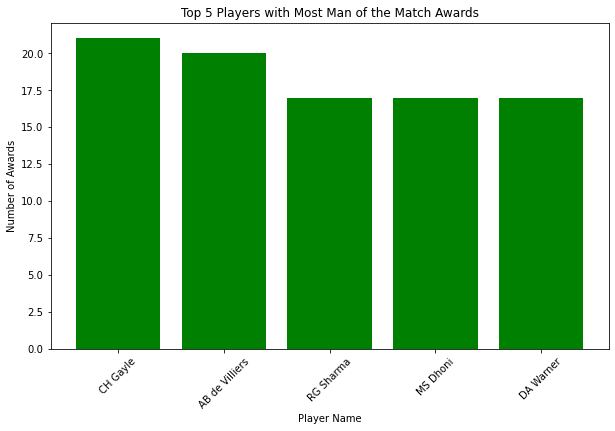

In [159]:
top_5 = ipl['player_of_match'].value_counts().nlargest(5)
plt.figure(figsize=(10,6))
plt.bar(top_5.index, top_5.values, color='green')
plt.title('Top 5 Players with Most Man of the Match Awards')
plt.xlabel('Player Name')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()

<h3> Frequency of match results </h3>

In [160]:
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

<h3> Number of toss wins w.r.t each team </h3>

In [161]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

<h3> Teams that chose to bat first</h3>

In [162]:
batting_first=ipl[ipl['win_by_runs']!=0]

In [163]:
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


<h3> Distribution of runs scored </h3>

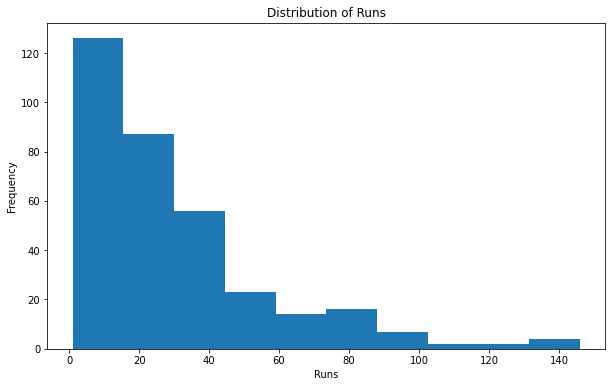

In [164]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(batting_first['win_by_runs'])
ax.set_title('Distribution of Runs')
ax.set_xlabel('Runs')
ax.set_ylabel('Frequency')
plt.show()

<h3> Winning teams that chose to bat first </h3>

In [165]:
winner_counts = batting_first['winner'].value_counts()
winner_names = winner_counts.index
print(winner_names)

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiant',
       'Delhi Capitals', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions'],
      dtype='object')


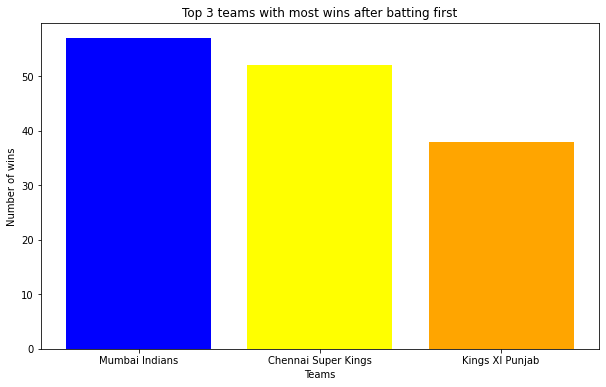

In [166]:
#Making a bar-plot for top 3 teams with most wins after batting first
top_teams = list(batting_first['winner'].value_counts().nlargest(3).index)
plt.figure(figsize=(10, 6))
plt.bar(top_teams, batting_first['winner'].value_counts()[top_teams], color=['blue', 'yellow', 'orange'])
plt.title('Top 3 teams with most wins after batting first')
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.show()

<h3> Teams that won which chose to bowl first </h3>

In [167]:
batting_second=ipl[ipl['win_by_wickets']!=0]

In [168]:
batting_second.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


<h3> Number of wickets Frequency </h3>

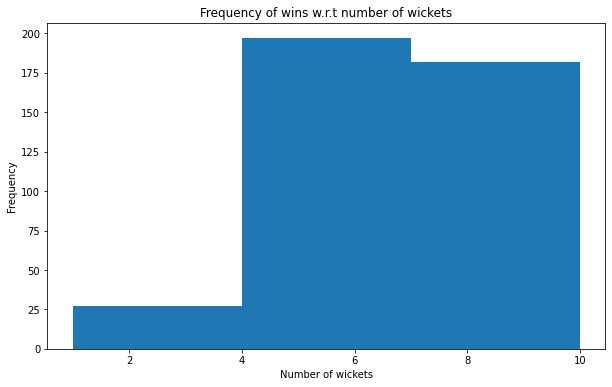

In [169]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(batting_second['win_by_wickets'], bins=3)

ax.set_title('Frequency of wins w.r.t number of wickets')
ax.set_xlabel('Number of wickets')
ax.set_ylabel('Frequency')

plt.show()

<h3> Teams that won after choosing to bat second </h3>

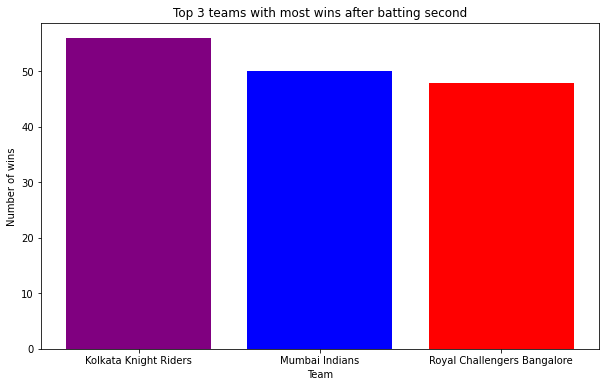

In [170]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(batting_second['winner'].value_counts()[0:3].keys()), list(batting_second['winner'].value_counts()[0:3]), color=["purple","blue","red"])

ax.set_title('Top 3 teams with most wins after batting second')
ax.set_xlabel('Team')
ax.set_ylabel('Number of wins')

plt.show()

<h3> Number of matches played in each season </h3>

In [171]:
ipl['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

<h3> Number of matches played in each city </h3>

In [172]:
#Looking at the number of matches played in each city
ipl['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

<h3>Number of teams that won both toss and match</h3>

In [173]:
num_toss_win_and_match_win = len(ipl[(ipl['toss_winner'] == ipl['winner'])])
print(num_toss_win_and_match_win)

393


<h3> Deliveries Table </h3>

In [174]:
deliveries=pd.read_csv('IPL/deliveries.csv')

In [175]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [176]:
deliveries.shape

(179078, 21)

It has 179078 observations with 21 columns which includes ball-by-ball records of all the matches.

In [177]:
len(deliveries['match_id'].unique())

756

There are 756 match records 
<h3> Exploring The First Match of IPL </h3>

In [178]:
match_1=deliveries[deliveries['match_id']==1]

In [179]:
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [180]:
match_1.shape

(248, 21)

In [181]:
match_1.dropna(inplace=True)

In [182]:
match_1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
199,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,4,KM Jadhav,TM Head,MC Henriques,0,...,0,0,0,0,1,0,1,KM Jadhav,run out,BCJ Cutting
206,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,TM Head,SR Watson,Rashid Khan,0,...,0,0,0,0,0,0,0,TM Head,caught,Yuvraj Singh
211,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,4,Sachin Baby,SR Watson,Bipul Sharma,0,...,0,0,0,0,0,0,0,Sachin Baby,caught,MC Henriques
230,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,SR Watson,B Kumar,0,...,0,0,0,0,0,0,0,STR Binny,caught,Yuvraj Singh
234,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,3,SR Watson,S Aravind,A Nehra,0,...,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques
242,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,5,TS Mills,YS Chahal,B Kumar,0,...,0,0,0,0,0,0,0,TS Mills,caught,DA Warner


In [183]:
match_1['dismissal_kind'].value_counts()

caught     9
run out    2
Name: dismissal_kind, dtype: int64

In [184]:
match_1[match_1['dismissal_kind']=='caught']['fielder'].value_counts()

Sachin Baby      2
DA Warner        2
Yuvraj Singh     2
MC Henriques     2
Mandeep Singh    1
Name: fielder, dtype: int64

In [185]:
deliveries[deliveries['dismissal_kind']=='caught']['fielder'].value_counts().nlargest(5)

KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
Name: fielder, dtype: int64

In [186]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [187]:
deliveries[deliveries['dismissal_kind']=='run out']['fielder'].value_counts().nlargest(5)

MS Dhoni     23
RA Jadeja    20
V Kohli      17
SK Raina     16
MK Pandey    14
Name: fielder, dtype: int64

<b> MS Dhoni </b> The Greatest Cricketer !!!

<h3> Number of matches won by each team </h3>

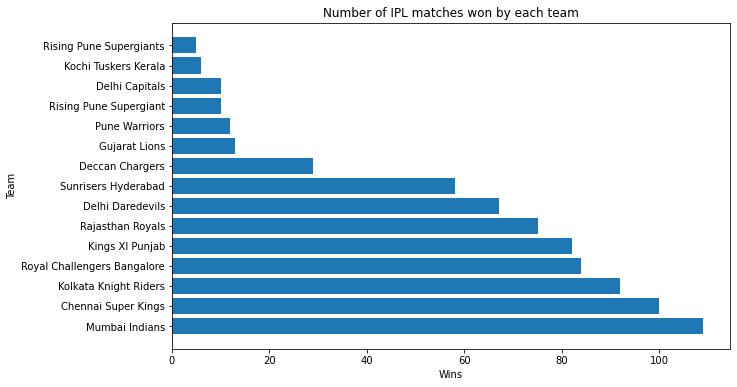

In [188]:
plt.figure(figsize=(10,6))
plt.barh(ipl['winner'].value_counts().index, ipl['winner'].value_counts().values)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of IPL matches won by each team')
plt.show()

<h3> Number of matches played in different stadiums </h3>

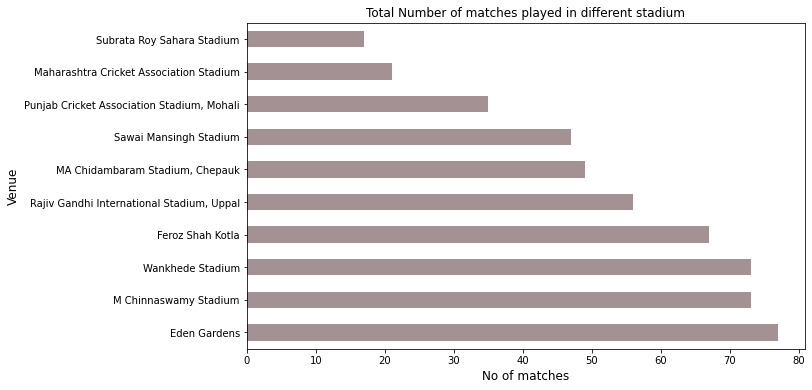

In [189]:
plt.figure(figsize=(10, 6))
ipl['venue'].value_counts().iloc[:10].plot(kind='barh', color='#a39193')
plt.xlabel('No of matches', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.title('Total Number of matches played in different stadium')
plt.show()

<h3>Toss Decision </h3>

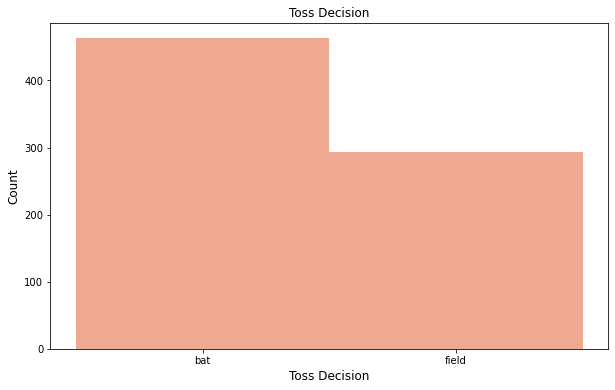

In [190]:
plt.figure(figsize=(10,6))
plt.hist(ipl['toss_decision'], bins=2, color='#eea990')
plt.xticks([0.25, 0.75], ['bat', 'field'])
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Toss Decision')
plt.show()


<h3> Dropping columns which are not required for analysis </h3>

In [191]:
cols_to_drop = ["umpire1", "umpire2","umpire3" ,"id", "date", "player_of_match", "city", "Season", "venue"]
ipl.drop(cols_to_drop, axis=1, inplace=True)

In [192]:
ipl.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0


<h3> Null Values </h3>

In [193]:
ipl.isnull().sum()

team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            4
win_by_runs       0
win_by_wickets    0
dtype: int64

In [194]:
ipl[ipl['winner'].isnull()]

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
300,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0
545,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0
570,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0
744,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0


In [195]:
ipl.dropna(inplace=True)

In [196]:
ipl.isnull().sum()

team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
dl_applied        0
winner            0
win_by_runs       0
win_by_wickets    0
dtype: int64

<h3> Modelling </h3>
<h4> Splitting target variable and features </h4>

In [197]:
X = ipl.drop(["winner"], axis=1)
y = ipl["winner"]
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

<h4> Converting target variable into one-hot encoding </h4>

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

<h4> train-test split </h4>

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

<h3> Random Forest Classifier </h3>

In [200]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()
#Training the random forest classifier model

model.fit(x_train, y_train)
#Predicting the model with x_test values and saving it as y_pred

y_pred = model.predict(x_test)
#Using the accuracy score of sklearn, evaluating the predicted result and accuracy of the model

from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest Classifier: ",accuracy_score(y_pred, y_test))


Accuracy of Random Forest Classifier:  0.9072847682119205


<h3> Classification Report </h3>

In [201]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.56      0.88      0.68        16
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00         1
           5       1.00      0.94      0.97        17
           7       0.96      1.00      0.98        22
           8       0.97      1.00      0.98        31
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00        14
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       1.00      0.93      0.97        15
          14       0.83      0.71      0.77         7

    accuracy                           0.91       151
   macro avg       0.74      0.70      0.70       151
weighted avg       0.90      0.91      0.90       151



<h3> GridSearchCV (Random Forest) </h3>

In [202]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Creating a random forest classifier instance
rf_clf = RandomForestClassifier(random_state=42)

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, verbose=1)

# Fitting the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# The best parameters and the corresponding mean cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score:  0.8869421487603306


In [203]:
grid_search_pred=grid_search.predict(x_test)

<h3>Accuracy of GridSearchCV</h3>

In [204]:
accuracy_score(y_test,grid_search_pred)

0.9205298013245033

<h3> Logistic Regression </h3>

In [205]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fitting the model to the training data
logreg.fit(x_train, y_train)

# Predicting on the testing data
y_pred = logreg.predict(x_test)

# Calculating accuracy
print("Accuracy of logistic regression:",accuracy_score(y_test, y_pred))

Accuracy of logistic regression: 0.5165562913907285


<h3>Logistic Regression using GridSearchCV </h3>

In [206]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5)
grid_search_logreg.fit(x_train, y_train)
best_estimator_logreg = grid_search_logreg.best_estimator_
y_pred = best_estimator_logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Accuracy: 0.5629139072847682
Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


<h3> K Nearest Neighbors Classifier </h3>

In [207]:
from sklearn.neighbors import KNeighborsClassifier

In [208]:
knn = KNeighborsClassifier(n_neighbors=10)

# Training the model on the training data
knn.fit(x_train, y_train)

# Predicting on test data
y_pred_knn = model.predict(x_test)

# Evaluating accuracy
accuracy_score(y_test,y_pred_knn)

0.9072847682119205

<h3> KNN Using GridSearchCV </h3>


In [210]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search_knn.fit(x_train, y_train)

best_params_knn= grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print("Best Hyperparameters:", best_params_knn)
print("Best Score:", best_score_knn)


Best Hyperparameters: {'n_neighbors': 7}
Best Score: 0.4976170798898072


<h3> Learning Curves, Model Evaluation, and Model Selection </h3>

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(ax, estimator, title, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Accuracy")
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation accuracy")
    ax.legend(loc="best")



In [219]:
cv = 3  # Number of cross-validation folds
train_sizes = np.linspace(0.1, 1.0, 10)  #training set sizes


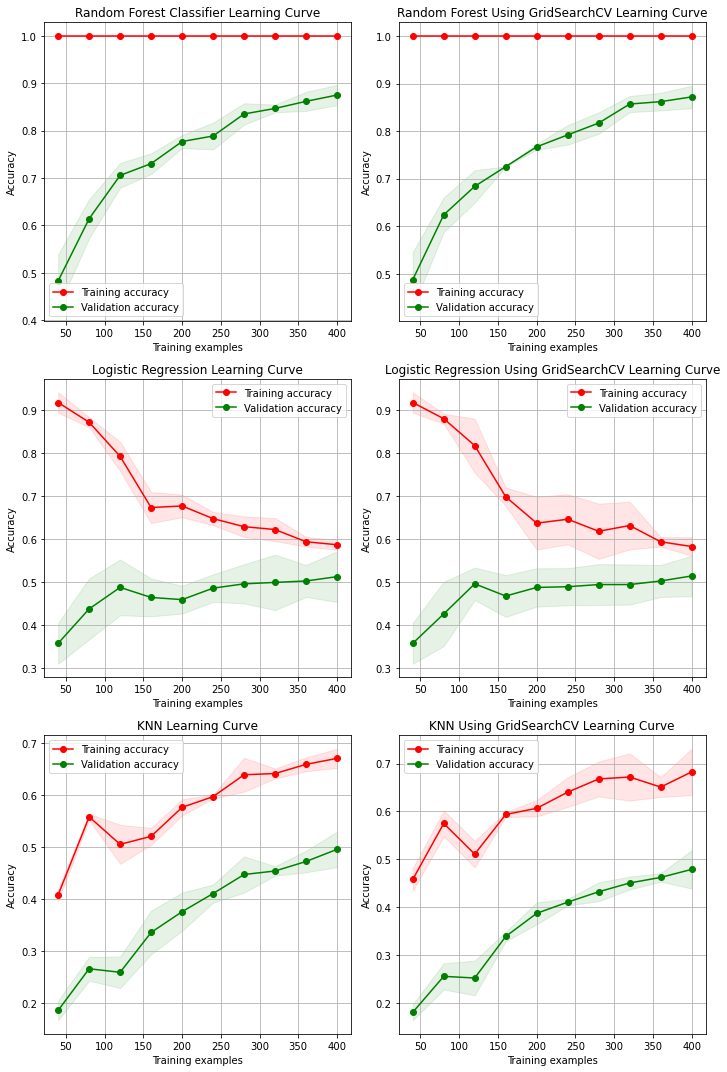

In [220]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

plot_learning_curve(axes[0, 0], random_forest_clf, "Random Forest Classifier Learning Curve", x_train, y_train, cv=cv, train_sizes=train_sizes)

plot_learning_curve(axes[0, 1], rf_clf, "Random Forest Using GridSearchCV Learning Curve", x_train, y_train, cv=cv, train_sizes=train_sizes)

plot_learning_curve(axes[1, 0], logreg, "Logistic Regression Learning Curve", x_train, y_train, cv=cv, train_sizes=train_sizes)

plot_learning_curve(axes[1, 1], grid_search_logreg, "Logistic Regression Using GridSearchCV Learning Curve", x_train, y_train, cv=cv, train_sizes=train_sizes)

plot_learning_curve(axes[2, 0], knn, "KNN Learning Curve", x_train, y_train, cv=cv, train_sizes=train_sizes)

plot_learning_curve(axes[2, 1], grid_search_knn, "KNN Using GridSearchCV Learning Curve", x_train, y_train, cv=cv, train_sizes=train_sizes)

plt.tight_layout()

plt.show()

<h3> Insights from learning curves </h3>
<p><strong>Random Forest Classifier:</strong></p>
<ul>
<li>The training accuracy curve is consistently high and close to 1.0, indicating that the model is able to fit the training data very well.</li>
<li>The validation accuracy curve shows an increasing trend as the number of training examples increases, suggesting that the model generalizes well to unseen data.</li>
<li>This behavior indicates that the model has a low bias and a reasonable variance, which is generally desirable.</li>
</ul>
<p><strong>Logistic Regression Classifier:</strong></p>
<ul>
<li>The training accuracy curve starts relatively high at around 0.9 but declines as the number of training examples increases.</li>
<li>The validation accuracy curve starts at a lower value (around 0.3) and shows a slight increase as more training examples are used.</li>
<li>Both curves tend to converge towards the center of the plot, indicating that the model's performance does not significantly improve with additional training examples.</li>
<li>This behavior suggests that the model may have a higher bias and may not be able to capture complex relationships in the data as effectively as the other models.</li>
</ul>
<p><strong>KNN Classifier:</strong></p>
<ul>
<li>The training accuracy curve shows an increasing trend as the number of training examples increases.</li>
<li>The validation accuracy curve follows a similar pattern, increasing as more training examples are used.</li>
<li>This behavior suggests that the model is able to learn from the training data and generalize well to unseen data.</li>
<li>However, it's important to note that the validation accuracy is lower compared to the Random Forest Classifier, indicating a relatively higher variance.</li>
</ul>

<h3> Final Model Selection </h3>

In [232]:
from sklearn.model_selection import cross_val_score
models=[random_forest_clf,rf_clf,logreg,grid_search_logreg,knn,grid_search_knn]
scores_cv=[]
for i in models:
    scores = cross_val_score(i, x_train, y_train, cv=3, scoring='accuracy')
    scores_cv.append(np.mean(scores))
for i in range(len(models)):
    print(f"Model {i+1}: {scores_cv[i]}")
    

Model 1: 0.8719154228855722
Model 2: 0.8652487562189055
Model 3: 0.5058955223880597
Model 4: 0.5091873963515754
Model 5: 0.502587064676617
Model 6: 0.4926202321724709


Based on the above scores, Model 2, i.e Random Forest with best estimators using GridSearchCV is preferred when compared to the rest.<br>
Both Random Forest and KNN have a balance between over-fitting and under-fitting. But the validation accuracy of KNN is lower than Random Forest.<br> Clearly, Logistic Regression shows that the model is under-fitted. <br>
<b><i> The Business Problem is to have higher accuracy on predictions, so considering all the above trained models, `Random Forest Classifier` would be the best choice due to its consistently high training accuracy and improving validation accuracy.Achieving bias-variance trade-off and generalization is important in this problem and due to increasing validation accuracy, this model will be the best choice. </i><b>

<h3 style="color:red"> Note : </h3> <br>
<i>"This is a public dataset, and many contributors on Kaggle have performed exploratory data analysis (EDA) and built models on this data to make predictions. However, we went further by applying GridSearchCV to find the best estimators for all the models we trained. We conducted thorough EDA with visualizations to gain insights into the data and performed model evaluation and selection, accompanied by interpretation of the results"</i>

## References

1. Analytics Vidhya. "IPL Team Win Prediction Project using Machine Learning." Available at: [link](https://www.analyticsvidhya.com/blog/2022/05/ipl-team-win-prediction-project-using-machine-learning/).
2. IPL Official Website. Available at: [link](https://www.iplt20.com).
3. Kaggle. "IPL Data Set." Available at: [link](https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set).
